In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
df = pd.read_excel('data/fruit_data_with_colors.xlsx')
print(df.head())
print(f"Number of examples: {len(df)}")

   fruit_label fruit_name fruit_subtype  mass  width  height  color_score
0            1      apple  granny_smith   192    8.4     7.3         0.55
1            1      apple  granny_smith   180    8.0     6.8         0.59
2            1      apple  granny_smith   176    7.4     7.2         0.60
3            2   mandarin      mandarin    86    6.2     4.7         0.80
4            2   mandarin      mandarin    84    6.0     4.6         0.79
Number of examples: 59


In [ ]:
df_categories = df.drop(df.columns[3:], axis=1)

print(df_categories.drop_duplicates().sort_values('fruit_label'))

    fruit_label fruit_name     fruit_subtype
0             1      apple      granny_smith
8             1      apple          braeburn
13            1      apple  golden_delicious
18            1      apple       cripps_pink
3             2   mandarin          mandarin
24            3     orange     spanish_jumbo
27            3     orange  selected_seconds
33            3     orange      turkey_navel
43            4      lemon    spanish_belsan
49            4      lemon           unknown


In [59]:
unique_fruits = df['fruit_name'].unique()

print(unique_fruits)

['apple' 'mandarin' 'orange' 'lemon']


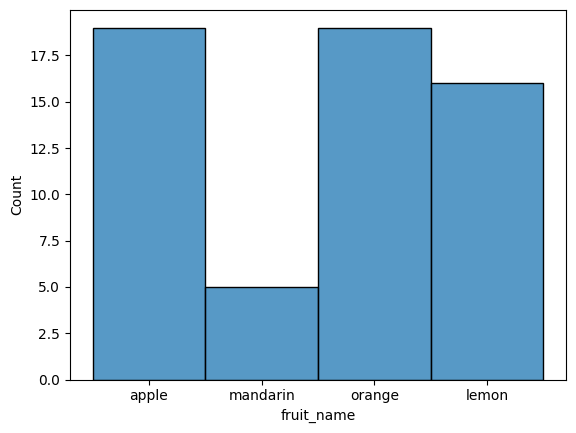

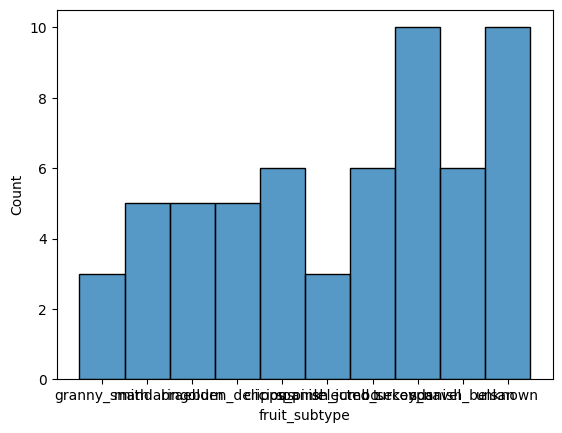

In [56]:
sns.histplot(df['fruit_name'])
plt.show()
sns.histplot(df['fruit_subtype'])
plt.show()


In [34]:
df_numerical_features = df.drop(df.columns[1:3], axis=1)
print(df_numerical_features.head())

   fruit_label  mass  width  height  color_score
0            1   192    8.4     7.3         0.55
1            1   180    8.0     6.8         0.59
2            1   176    7.4     7.2         0.60
3            2    86    6.2     4.7         0.80
4            2    84    6.0     4.6         0.79


In [35]:
print(df.isnull().sum())


fruit_label      0
fruit_name       0
fruit_subtype    0
mass             0
width            0
height           0
color_score      0
dtype: int64


In [36]:

df_numerical_features_no_label = df_numerical_features.drop(df.columns[0], axis=1)
df_numerical_features_no_label.agg(['min', 'max', 'mean', 'std'])

,mass,width,height,color_score
min,76.000000,5.800000,4.000000,0.550000
max,362.000000,9.600000,10.500000,0.930000
mean,163.118644,7.105085,7.693220,0.762881
std,55.018832,0.816938,1.361017,0.076857


In [53]:
df.describe()

,fruit_label,mass,width,height,color_score
count,59.000000,59.000000,59.000000,59.000000,59.000000
mean,2.542373,163.118644,7.105085,7.693220,0.762881
std,1.208048,55.018832,0.816938,1.361017,0.076857
min,1.000000,76.000000,5.800000,4.000000,0.550000
25%,1.000000,140.000000,6.600000,7.200000,0.720000
50%,3.000000,158.000000,7.200000,7.600000,0.750000
75%,4.000000,177.000000,7.500000,8.200000,0.810000
max,4.000000,362.000000,9.600000,10.500000,0.930000


array([[<Axes: title={'center': 'mass'}>,
        <Axes: title={'center': 'width'}>],
       [<Axes: title={'center': 'height'}>,
        <Axes: title={'center': 'color_score'}>]], dtype=object)

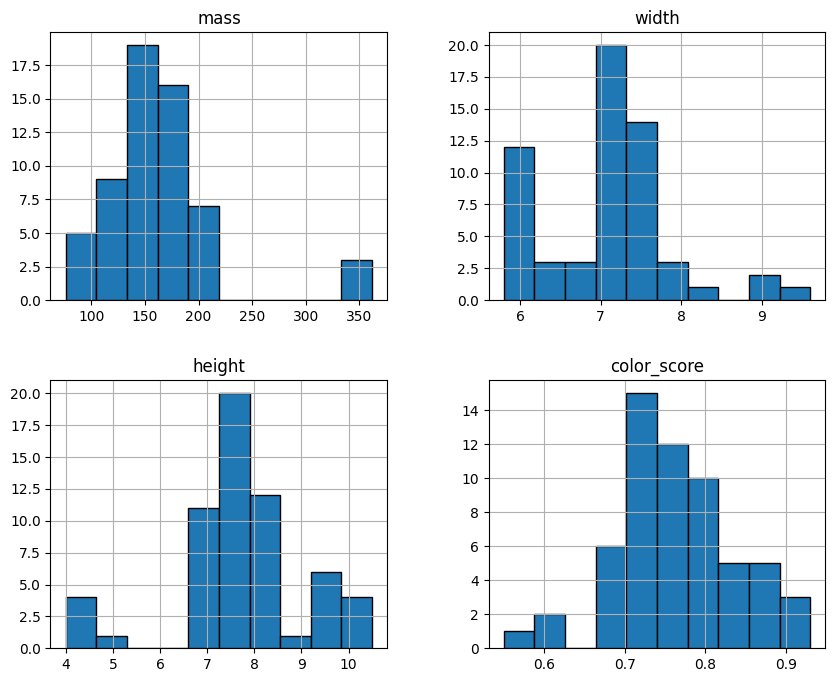

In [37]:

df_numerical_features_no_label.hist(bins=10,
                            figsize=(10, 8),
                            edgecolor='black')

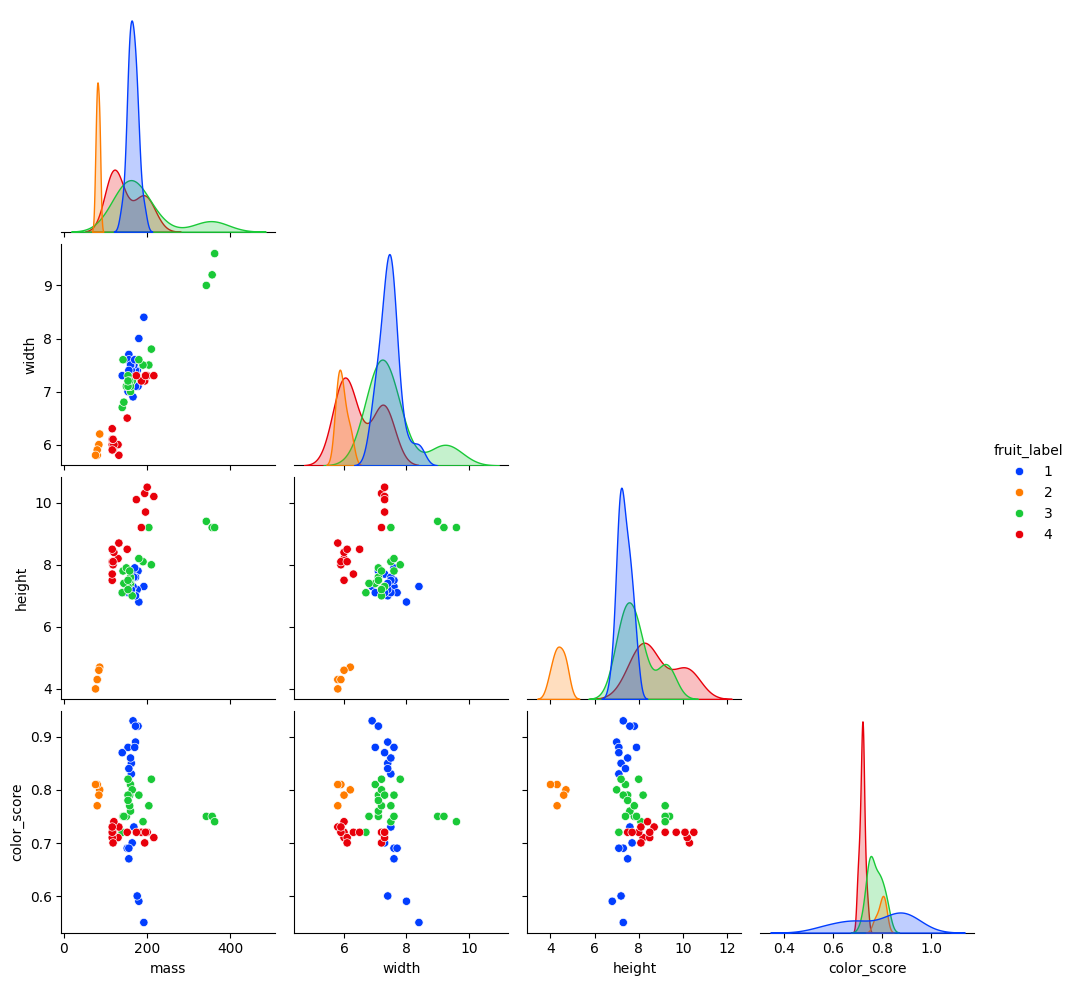

In [38]:

sns.pairplot(df_numerical_features,
             hue='fruit_label', palette='bright', corner=True)

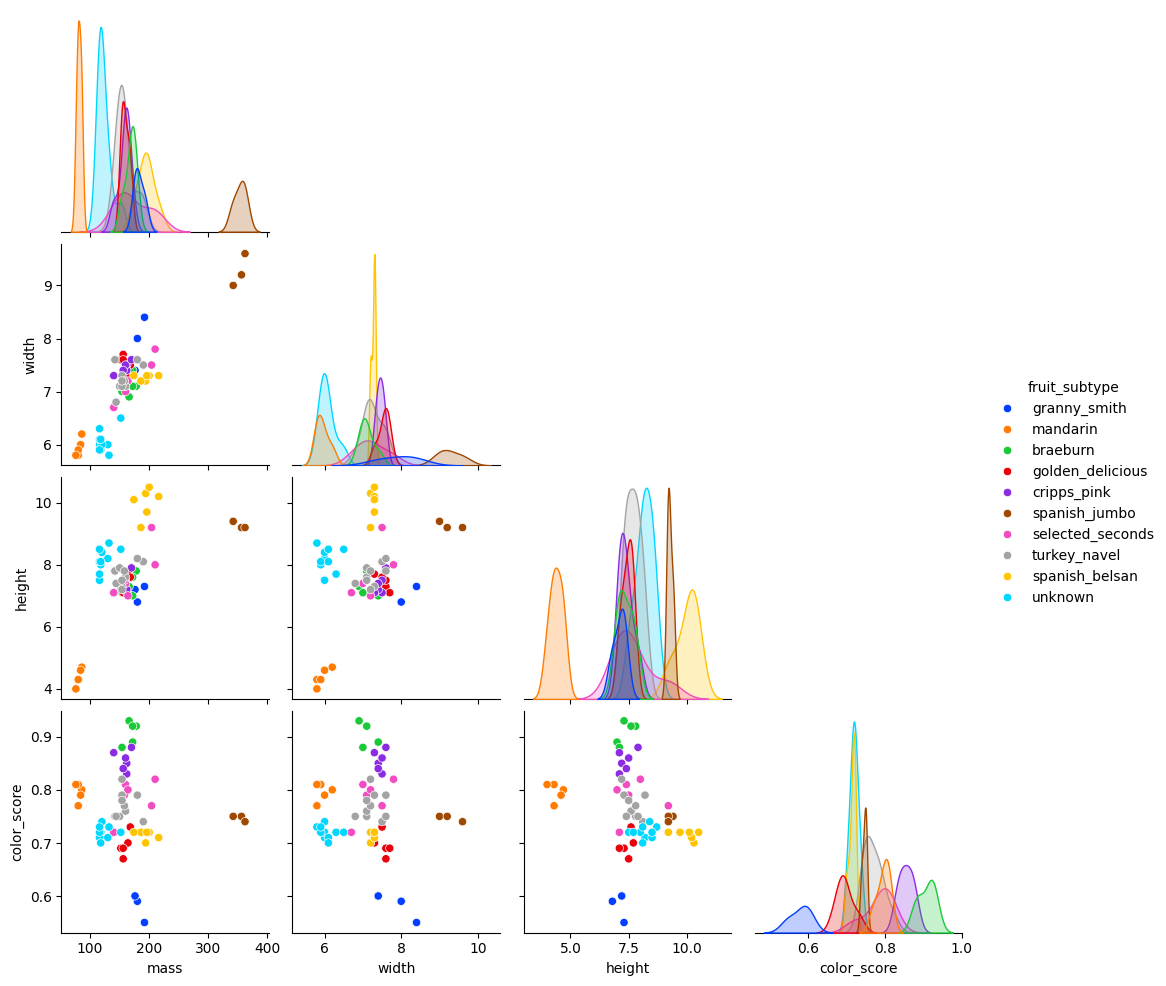

In [52]:
df_fruitsubtypes_features = df.drop(df.columns[:2], axis=1)
sns.pairplot(df_fruitsubtypes_features,
             hue='fruit_subtype', palette='bright', corner=True)


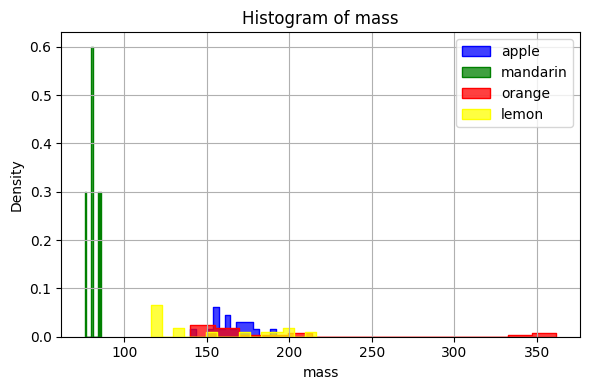

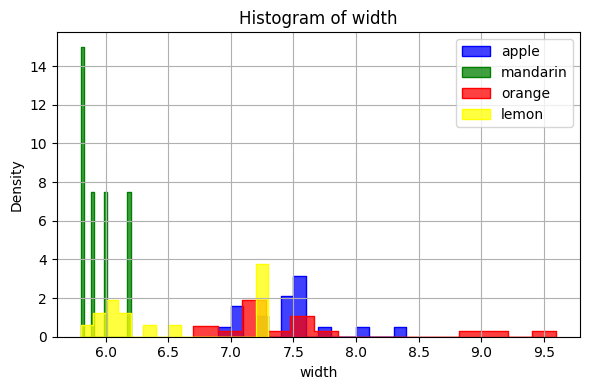

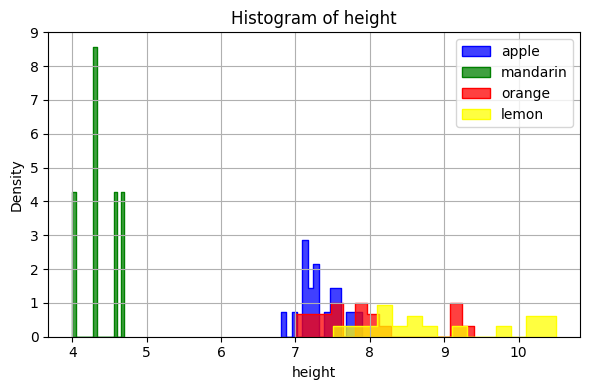

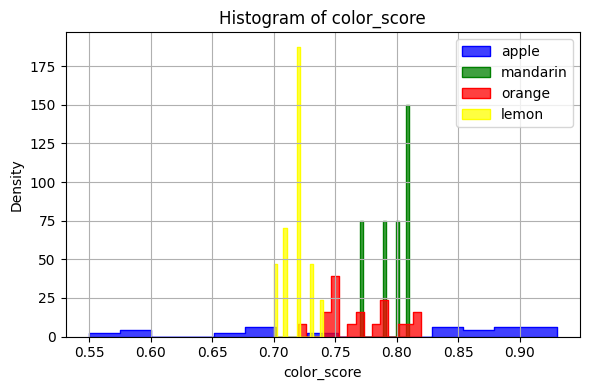

In [63]:
colors = ['blue', 'green', 'red', 'yellow']
feature_names = ['mass','width','height','color_score']
for feature in feature_names:
    plt.figure(figsize=(6, 4))
    for species, color in zip(unique_fruits, colors):
        subset = df[df['fruit_name'] == species]
        sns.histplot(subset[feature],
                     kde=False,
                     label=species,
                     color=color,
                     stat='density',
                     bins=15, element="step")

    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

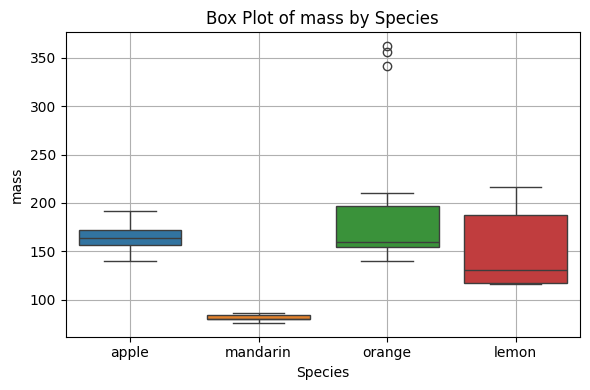

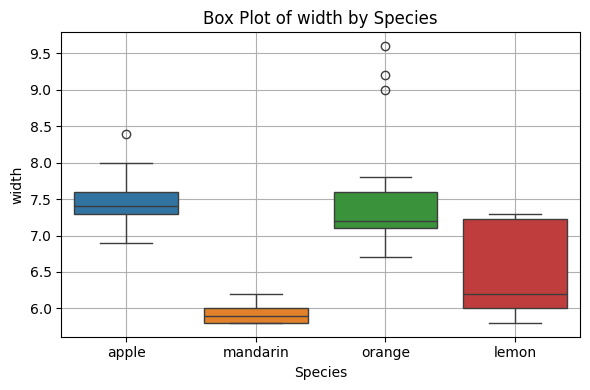

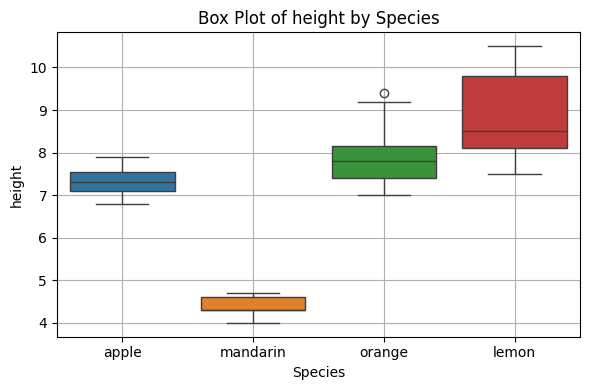

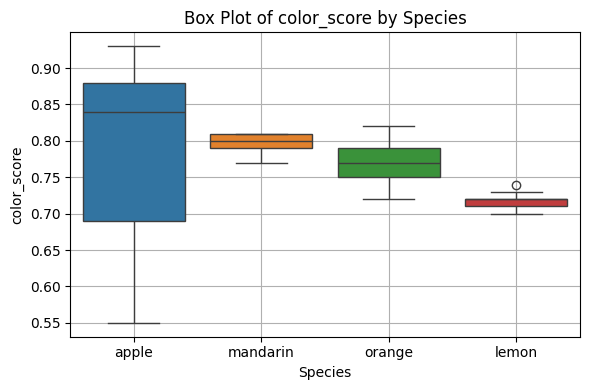

In [64]:


# Create one box plot per feature
for feature in feature_names:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='fruit_name', y=feature,
                data=df,
                hue = 'fruit_name',
                legend=False)
    plt.title(f'Box Plot of {feature} by Species')
    plt.xlabel('Species')
    plt.ylabel(feature)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

<Axes: >

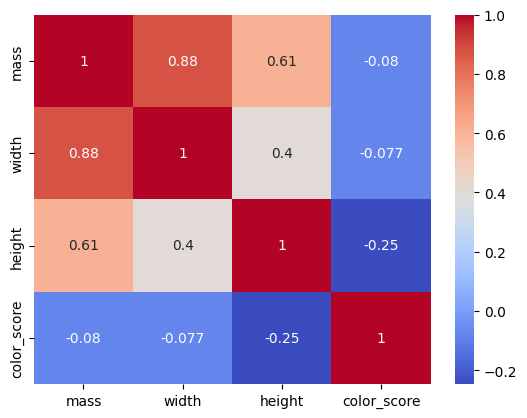

In [39]:
corr = df_numerical_features_no_label.corr() # correlation

sns.heatmap(corr, annot=True, cmap='coolwarm')

Next: Try various KNN trainings with different feature combinations

Also, do: evaluation data